In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('C:/Users/LENOVO/creditcard.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X= df.drop('Class',axis=1)
y=df['Class']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree= DecisionTreeClassifier(criterion='entropy',random_state=0)

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
y_pred= dtree.predict(X_test)

In [12]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(56962,))

In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.86      0.76      0.80       103

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
print(confusion_matrix(y_test,y_pred))

[[56846    13]
 [   25    78]]


In [16]:
print('Accuraccy by Decision Tree is : ',accuracy_score(y_test,y_pred)) 

Accuraccy by Decision Tree is :  0.9993328885923949


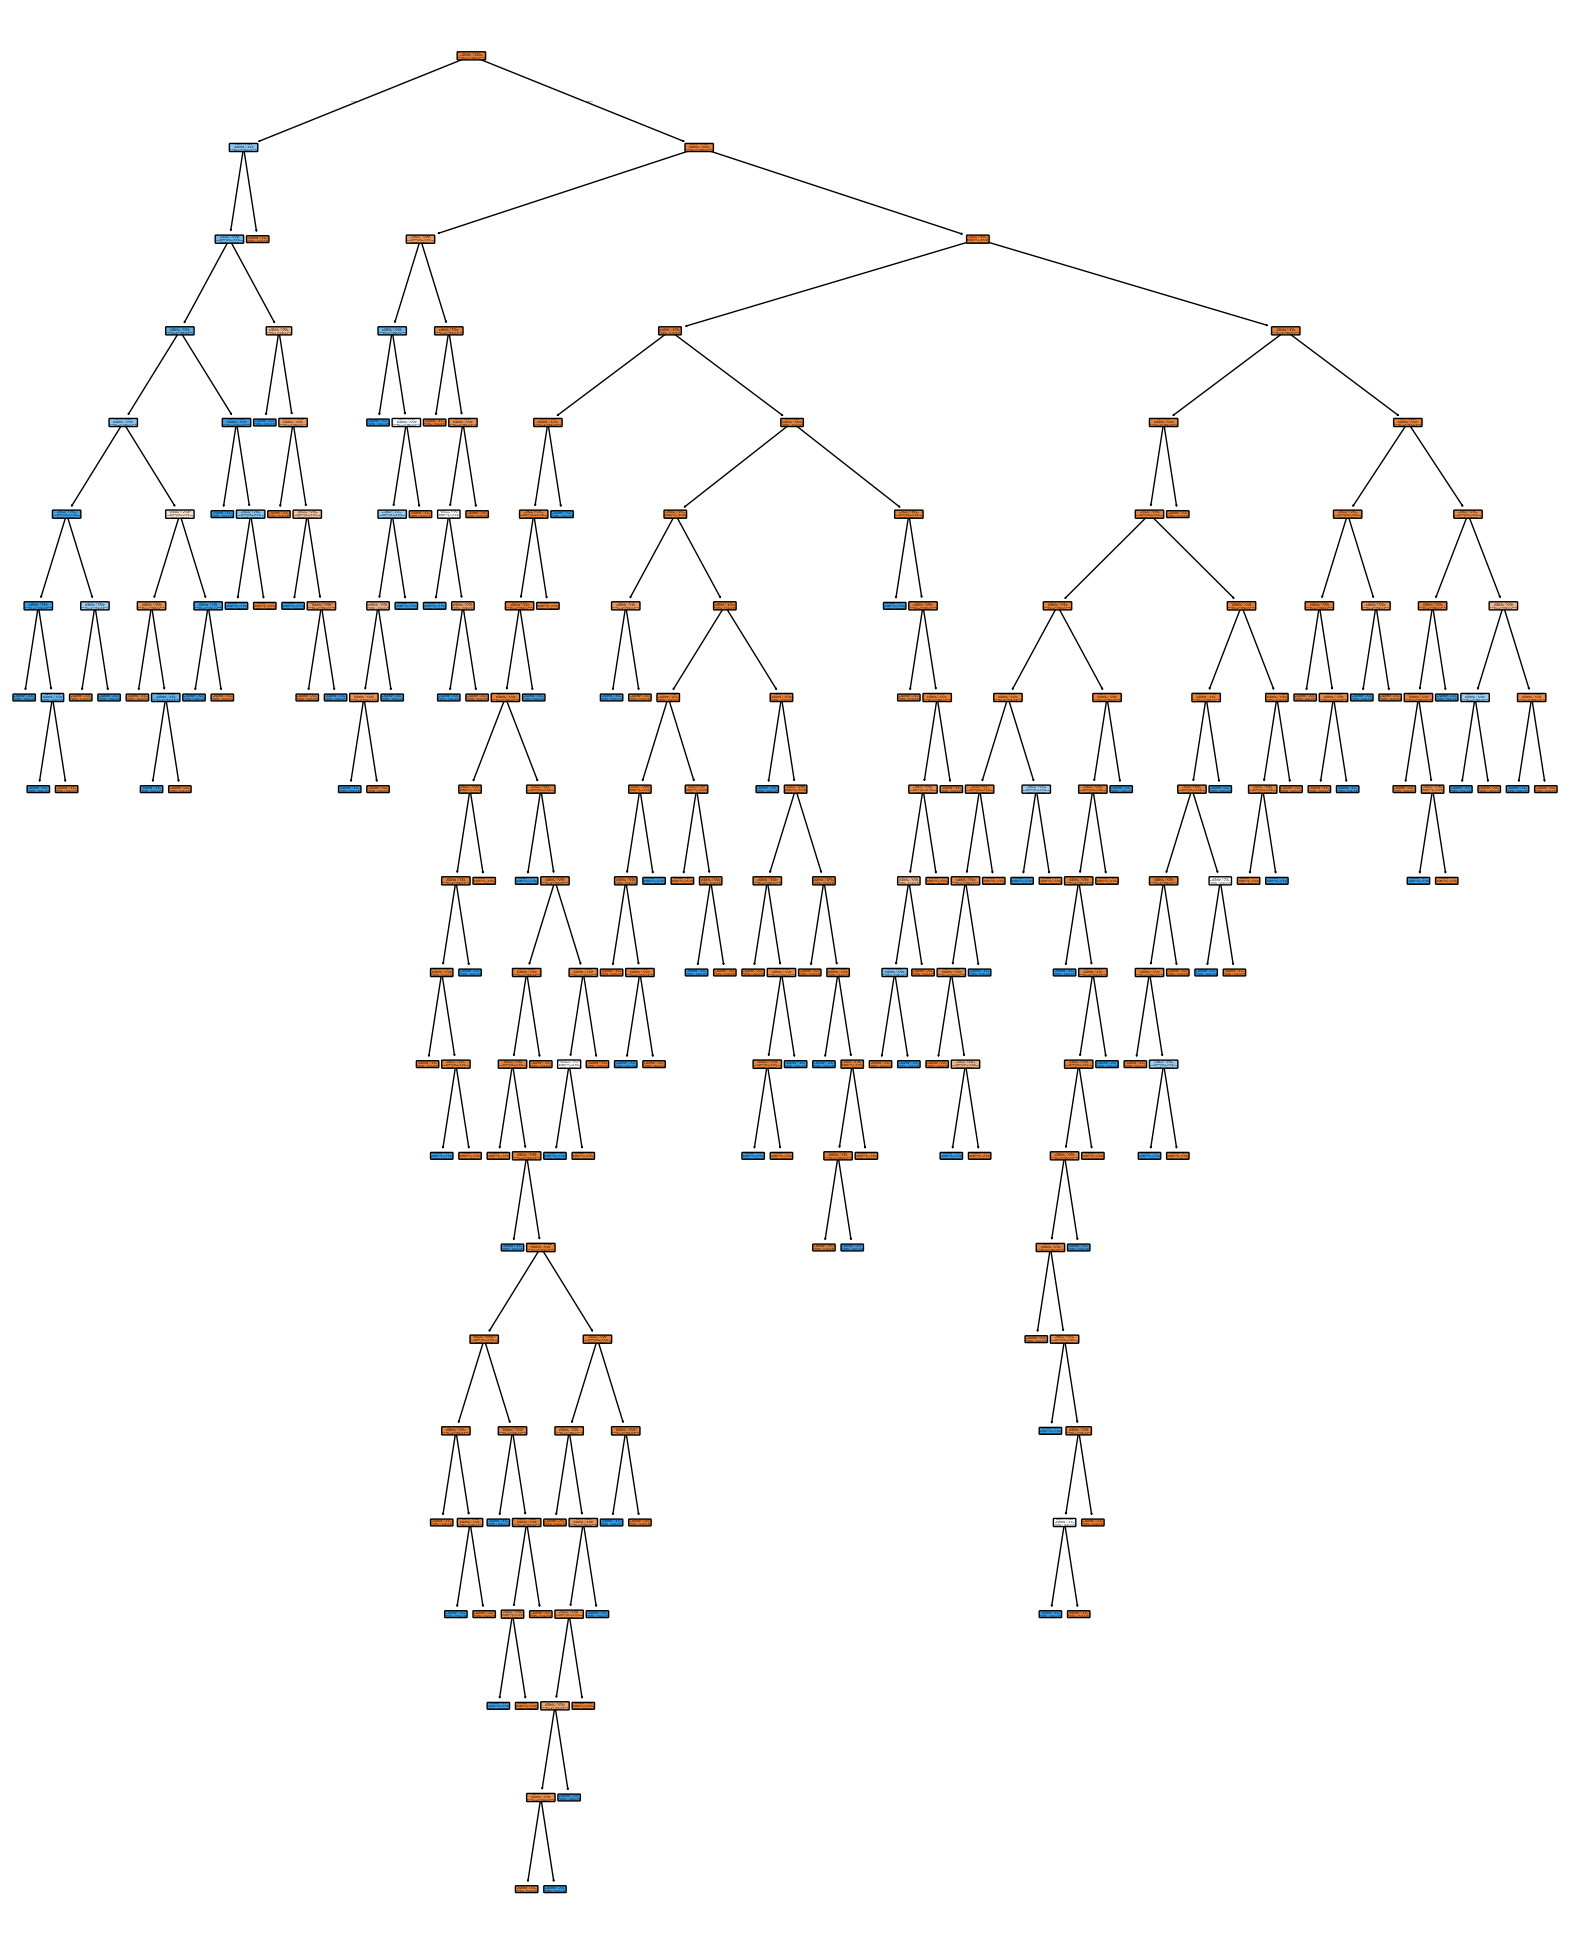

In [17]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(dtree,feature_names=X.columns,class_names=['Class-1','Class-0'],rounded=True, 
               filled=True,
               proportion=True
              )
plt.show()

Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [19]:
lr.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred2= lr.predict(X_test)

In [21]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.79      0.74      0.76       103

    accuracy                           1.00     56962
   macro avg       0.90      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
print(confusion_matrix(y_test,y_pred2))

[[56839    20]
 [   27    76]]


In [23]:
print('Accuracy by using Logistic Regression is :' ,accuracy_score(y_test,y_pred2))

Accuracy by using Logistic Regression is : 0.9991748885221726


Ensembling Decision Tree and Logistic Regression

In [24]:
from sklearn.ensemble import VotingClassifier
vc= VotingClassifier(
    estimators=[('dt',dtree),('lr',lr)]
)

In [25]:
vc.fit(X_train,y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('lr', LogisticRegression())])

In [26]:
y_pred3=vc.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.96      0.70      0.81       103

    accuracy                           1.00     56962
   macro avg       0.98      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
print(confusion_matrix(y_test,y_pred3))

[[56856     3]
 [   31    72]]


In [29]:
print('Accuracy using ensemble is :',accuracy_score(y_test,y_pred3))

Accuracy using ensemble is : 0.999403110845827


In [37]:
import joblib
joblib.dump(vc,'vc.pickle')


['vc.pickle']

In [38]:
with open("C:/Users/LENOVO/Desktop/Credit Card/app.py", "rb") as f:
    content = f.read()
    print(content[:100])

b'import streamlit as st\r\nimport joblib\r\nimport numpy as np\r\n\r\nmodel=joblib.load(open("C:/Users/LENOVO'
